In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
latent_dim = 100
batch_size = 64
lr = 0.0002
epochs = 100


In [4]:
# Data Processing

transform = transforms.Compose([
    transforms.ToTensor(),                      
    transforms.Normalize((0.5,), (0.5,))        
])

In [5]:
dataloader = DataLoader(
    datasets.MNIST(root='./data', train=True, transform=transform, download=True),
    batch_size=batch_size,
    shuffle=True
)

In [6]:
class Generator(nn.Module):
    def _init_(self):
        super(Generator, self)._init_()
        self.main = nn.Sequential(
            nn.Linear(latent_dim, 128), 
            nn.ReLU(True),               
            nn.Linear(128, 784),         
            nn.Tanh()                    
        )

In [7]:
class Discriminator(nn.Module):
    def _init_(self):
        super(Discriminator, self)._init_()
        self.main = nn.Sequential(
            nn.Linear(784, 128),          
            nn.LeakyReLU(0.2),            
            nn.Linear(128, 1),            
            nn.Sigmoid()                  
        )

In [8]:
G = Generator().to(device)
D = Discriminator().to(device)

In [9]:
import torch.nn as nn
import torch.optim as optim

# Generator
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.main = nn.Sequential(
            nn.Linear(100, 784),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

# Discriminator
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.main = nn.Sequential(
            nn.Linear(784, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.main(x.view(-1, 784))

# Instantiate
G = Generator()
D = Discriminator()

# Learning rate
lr = 0.0002

# Loss and optimizers
criterion = nn.BCELoss()
optimizer_G = optim.Adam(G.parameters(), lr=lr)
optimizer_D = optim.Adam(D.parameters(), lr=lr)


In [10]:
def show_images(fake_images, epoch):
    grid = fake_images[:25].detach().cpu()
    grid = grid.view(-1, 1, 28, 28)
    grid = torch.cat([img for img in grid], dim=2).squeeze().numpy()
    plt.figure(figsize=(10, 2))
    plt.title(f'Generated Images at Epoch {epoch}')
    plt.imshow(grid, cmap='gray')
    plt.axis('off')
    plt.show()

In [11]:
for epoch in range(epochs):
    for i, (real_images, _) in enumerate(dataloader):
        real_images = real_images.to(device)
        batch_size_curr = real_images.size(0)

        real_labels = torch.ones(batch_size_curr, 1).to(device)
        fake_labels = torch.zeros(batch_size_curr, 1).to(device)

In [12]:
z = torch.randn(batch_size_curr, latent_dim).to(device)  
fake_images = G(z)  

real_loss = criterion(D(real_images), real_labels)  
fake_loss = criterion(D(fake_images.detach()), fake_labels)  
d_loss = real_loss + fake_loss

optimizer_D.zero_grad()
d_loss.backward()
optimizer_D.step()

In [13]:
z = torch.randn(batch_size_curr, latent_dim).to(device)
fake_images = G(z)
g_loss = criterion(D(fake_images), real_labels)  

optimizer_G.zero_grad()
g_loss.backward()
optimizer_G.step()

Epoch [100/100]  D Loss: 1.2855, G Loss: 0.7826


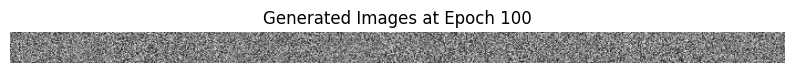

In [14]:
print(f"Epoch [{epoch+1}/{epochs}]  D Loss: {d_loss.item():.4f}, G Loss: {g_loss.item():.4f}")

if (epoch+1) % 5 == 0 or epoch == 0:
    show_images(fake_images, epoch+1)